<a href="https://colab.research.google.com/github/kmykz/ML-course-proj/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC

In [ ]:
df = pd.read_csv('drive/MyDrive/data/ML-data.csv')
#df.head()
#Commented this section for pushing to github to avoid data leak

<ipython-input-2-36bc3b93c58d>:1: DtypeWarning: Columns (28,29,31,33,35,37,39,41,43,47,49,51,55,57,59,61,63,65,67,69,71,77,79,81,83,85,87,91,93,95,97,101,103,105,107,109,136,137,139,140,145,148,153,156,161,163,164,168,169,171,172) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drive/MyDrive/data/ML-data.csv')


In [ ]:
def get_correlation(column_name):
    return df[column_name].corr(df['Diabetes'])

In [ ]:
print(get_correlation('[PVD)'))
print(get_correlation('[Stent)'))
print(get_correlation('[UTI)'))
print(get_correlation('Age_at_Exam'))
print(get_correlation('[Stroke)'))
print(get_correlation('BMI'))
print(get_correlation('FBS'))
print(get_correlation('HTN'))
print(get_correlation('[Cancer)'))
print(get_correlation('[Arrhythmia)'))
print(get_correlation('[Dialysis)'))
print(get_correlation('[ESRD)'))
print(get_correlation('[Sarcoma)'))
print(get_correlation('[NAFLD)'))
print(get_correlation('Year'))
print(get_correlation('TG'))

0.04770732058582107
0.030160520300496964
-0.03719811871837726
0.19736368271324375
0.04494157895710559
0.19957524462389195
0.6017546483237239
0.20146933732699185
-0.019839979117554137
-0.020267519145971222
0.039561225373166885
0.043730664555074183
0.010625023531554525
0.011705509390944517
0.041751189846110245
0.17092363708050604


In [ ]:
#features to be kept
features = ['Patient_ID','Age_at_Exam', 'Sex', 'BMI', 'FBS', 'HTN', '[Cancer)', '[Arrhythmia)', '[Dialysis)', '[ESRD)', '[Sarcoma)', '[NAFLD)', 'Year', '[PVD)', '[Stent)', '[UTI)', 'Diabetes','TG']
#filter the features
df_fil = df[features]
#for each patient_id keep the record with the minimum Year
df_fil = df_fil.sort_values(by=['Patient_ID', 'Year'])
df_fil = df_fil.drop_duplicates(subset=['Patient_ID'], keep='first')
#print dimentions of df_fil
print(df_fil.shape)
#print classes and their numbers for Diabetes
print(df_fil['Diabetes'].value_counts())
#drop Year
df_fil = df_fil.drop(columns=['Year', 'Patient_ID'])
# replace unknown/NA/Nan and null values with -1
df_fil = df_fil.fillna(-1)
df_fil['Sex'] = df_fil['Sex'].replace('Male', 0)
df_fil['Sex'] = df_fil['Sex'].replace('Female', 1)
bmi_mean = df_fil['BMI'].mean()
bmi_std = df_fil['BMI'].std()
df_fil = df_fil[df_fil['BMI'] < bmi_mean+3*bmi_std]
df_fil = df_fil[df_fil['BMI'] > bmi_mean-3*bmi_std]
#divide training/test 20/10/70 randomly for test,validation, train
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_fil, test_size=0.3, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=1/3, random_state=42)

(171619, 18)
Diabetes
0    145699
1     25920
Name: count, dtype: int64


<ipython-input-5-7f19ba1004dd>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fil['Sex'] = df_fil['Sex'].replace('Female', 1)


In [ ]:

def draw_scatter(feature):
    plt.figure(figsize=(10,6))
    mean = df_fil[feature].mean()
    std = df_fil[feature].std()
    plt.scatter( df_fil['Diabetes'], df_fil[feature])
    plt.xlabel('Diabetes')
    plt.ylabel(feature)
    plt.title('Diabetes vs'+ feature)
    plt.axhline(y=mean, color='r', linestyle='--', label='Mean')
    plt.axhline(y=mean-3*std, color='r', linestyle='--')
    plt.axhline(y=mean+3*std, color='r', linestyle='--')
    plt.legend()
    plt.show()

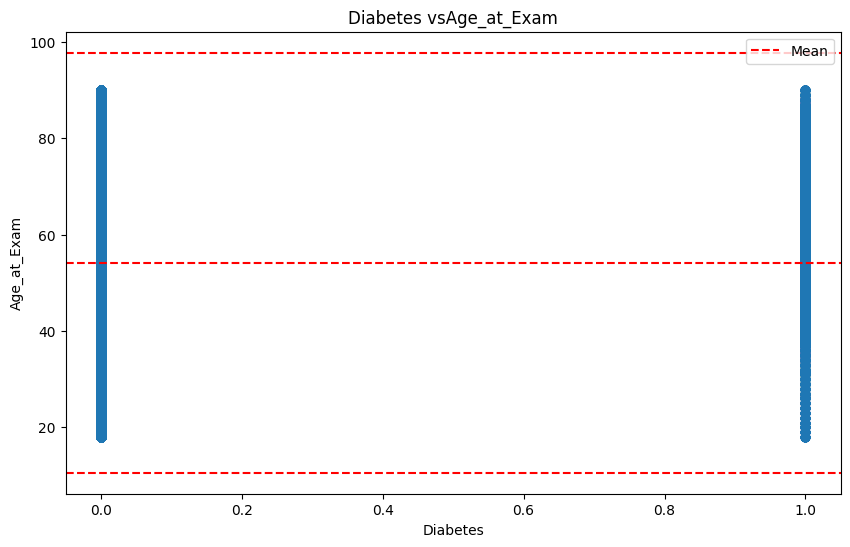

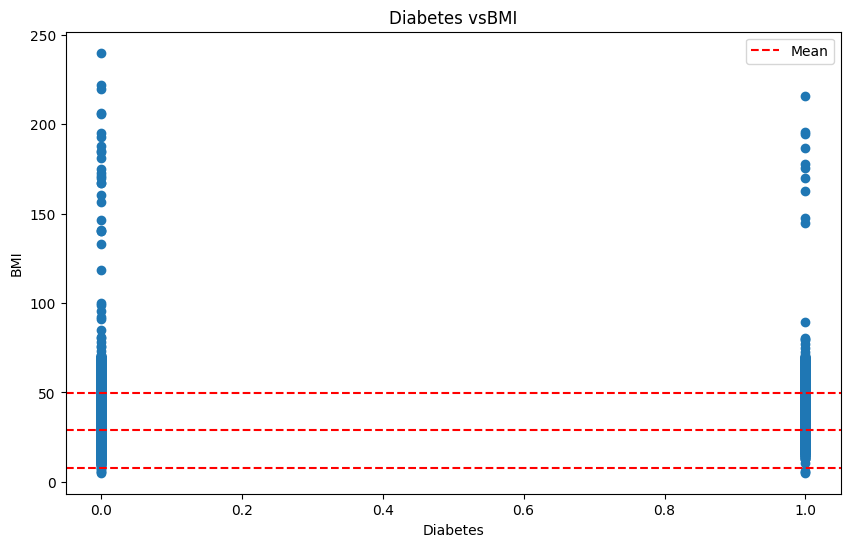

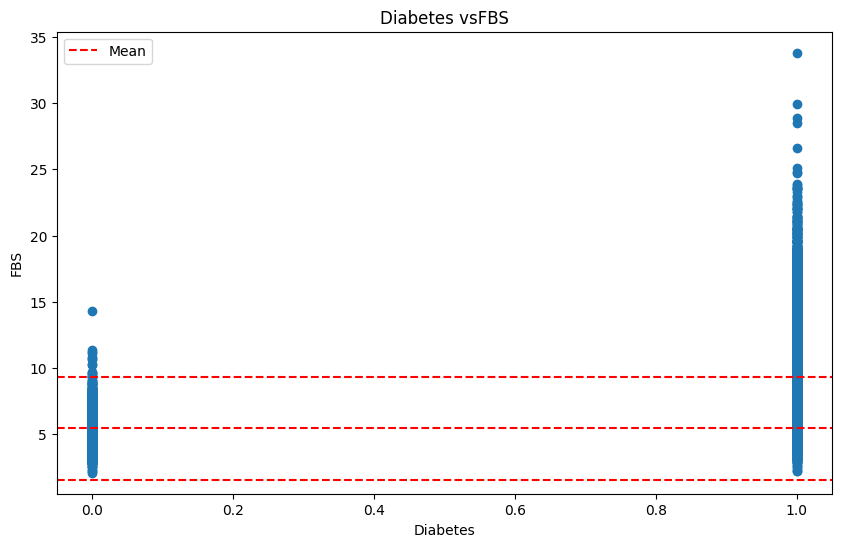

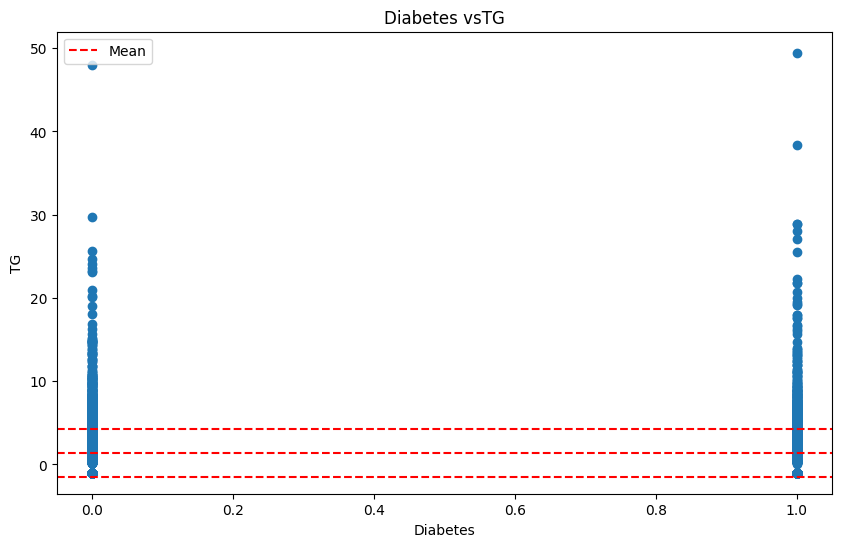

In [ ]:
draw_scatter('Age_at_Exam')
draw_scatter('BMI')
draw_scatter('FBS')
draw_scatter('TG')

In [ ]:
from sklearn.preprocessing import StandardScaler
#remove entries with BMI out of 3*se interval
scaler = StandardScaler()
df_train[['Age_at_Exam', 'BMI', 'FBS','TG']] = scaler.fit_transform(df_train[['Age_at_Exam', 'BMI', 'FBS','TG']])
df_test[['Age_at_Exam', 'BMI', 'FBS','TG']] = scaler.transform(df_test[['Age_at_Exam', 'BMI', 'FBS','TG']])
df_val[['Age_at_Exam', 'BMI', 'FBS','TG']] = scaler.transform(df_val[['Age_at_Exam', 'BMI', 'FBS','TG']])
#Use diabetes as target
y_train = df_train['Diabetes']
y_test = df_test['Diabetes']
y_val = df_val['Diabetes']
#drop Diabetes from training/test
df_train = df_train.drop(columns=['Diabetes'])
df_test = df_test.drop(columns=['Diabetes'])
df_val = df_val.drop(columns=['Diabetes'])
print(y_train.value_counts())
smote = SMOTENC(categorical_features=['Sex', 'HTN', '[Cancer)', '[Arrhythmia)', '[Dialysis)', '[ESRD)', '[Sarcoma)', '[NAFLD)', '[PVD)', '[Stent)', '[UTI)'], random_state=42)
df_train, y_train = smote.fit_resample(df_train, y_train)
print(y_train.value_counts())

Diabetes
0    100754
1     17724
Name: count, dtype: int64
Diabetes
0    100754
1    100754
Name: count, dtype: int64


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report

train_data = TensorDataset(torch.tensor(df_train.values, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_data = TensorDataset(torch.tensor(df_test.values, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_data = TensorDataset(torch.tensor(df_val.values, dtype=torch.float32), torch.tensor(y_val.values, dtype=torch.float32))
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

In [ ]:

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(15, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x
class EnhancedNet(nn.Module):
    def __init__(self):
        super(EnhancedNet, self).__init__()
        self.fc1 = nn.Linear(15, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 1)
        self.dropout = nn.Dropout(0.4)
        self.batchnorm1 = nn.BatchNorm1d(10)
        self.batchnorm2 = nn.BatchNorm1d(5)


    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.batchnorm1(x)
        x = torch.relu(self.fc2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x

#net = SimpleNet()
net = EnhancedNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        outputs = outputs.squeeze(1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

    for i, data in enumerate(val_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        outputs = outputs.squeeze(1)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Validation Loss: {running_loss/len(val_loader)}")

print('Finished Training')
#classification report
y_pred = []
y_true = []
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        outputs = outputs.squeeze(1)
        outputs = (outputs > 0.5).float()
        y_pred.extend(outputs.cpu().numpy())
        y_true.extend(labels.cpu().numpy())
print(classification_report(y_true, y_pred))


Epoch 1, Loss: 0.425133262845818
Epoch 1, Validation Loss: 3.344363176417035
Epoch 2, Loss: 0.40784459917904575
Epoch 2, Validation Loss: 3.171042281549797
Epoch 3, Loss: 0.40737231671289625
Epoch 3, Validation Loss: 3.188794745938652
Epoch 4, Loss: 0.40707060234977843
Epoch 4, Validation Loss: 3.2288399179992466
Epoch 5, Loss: 0.4059516540635348
Epoch 5, Validation Loss: 3.193991223290309
Epoch 6, Loss: 0.4060616891993232
Epoch 6, Validation Loss: 3.1699671320518608
Epoch 7, Loss: 0.4047205968106047
Epoch 7, Validation Loss: 3.1610993626606714
Epoch 8, Loss: 0.4057620697790534
Epoch 8, Validation Loss: 3.1513745634480324
Epoch 9, Loss: 0.4038998656644447
Epoch 9, Validation Loss: 3.1135228004567113
Epoch 10, Loss: 0.40621907289783776
Epoch 10, Validation Loss: 3.1527882566805823
Finished Training
              precision    recall  f1-score   support

         0.0       0.97      0.67      0.80     14430
         1.0       0.32      0.88      0.47      2496

    accuracy               

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# Detect GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class NeuralNode(nn.Module):
    """A neural network for decision nodes in the tree."""
    def __init__(self, input_dim):
        super(NeuralNode, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)  # Outputs a decision value
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # Decision boundary

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return self.sigmoid(self.fc3(x))  # Output between 0 and 1

class NeuralDecisionTree:
    """A decision tree where each node is a neural network."""
    def __init__(self, input_dim, max_depth=3):
        self.input_dim = input_dim
        self.max_depth = max_depth
        self.root = self._build_tree(0)

    def _build_tree(self, depth):
        """Recursively build the tree by adding neural network nodes."""
        if depth >= self.max_depth:
            return {"is_leaf": True, "model": NeuralNode(self.input_dim).to(device)}

        node = NeuralNode(self.input_dim).to(device)
        return {
            "model": node,
            "is_leaf": False,
            "left": self._build_tree(depth + 1),
            "right": self._build_tree(depth + 1)
        }

    def forward(self, x, node=None):
        """Forward pass through the tree, returning leaf predictions."""
        if node is None:
            node = self.root

        if node["is_leaf"]:
            return node["model"](x)  # Final prediction at leaf

        decision = node["model"](x)
        if decision < 0.5:
            return self.forward(x, node["left"])
        else:
            return self.forward(x, node["right"])

    def fit(self, data_loader, epochs=10, lr=0.01):
        """Train the neural decision tree using end-to-end backpropagation with a data loader."""
        optimizer = optim.Adam(self.get_all_parameters(), lr=lr)
        criterion = nn.BCELoss()

        for epoch in range(epochs):
            epoch_loss = 0.0
            for X_batch, y_batch in data_loader:
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)

                optimizer.zero_grad()

                predictions = torch.stack([self.forward(x.unsqueeze(0)) for x in X_batch]).view(-1, 1)
                predictions = predictions.squeeze(1)
                loss = criterion(predictions, y_batch)

                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()

            print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(data_loader)}")
            for i, data in enumerate(val_loader, 0):
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                predictions = torch.stack([self.forward(x.unsqueeze(0)) for x in inputs]).view(-1, 1)
                predictions = predictions.squeeze(1)
                loss = criterion(predictions, labels)
                epoch_loss += loss.item()

            print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {epoch_loss/len(val_loader)}")

    def get_all_parameters(self):
        """Collects all trainable parameters from the tree."""
        def collect_params(node):
            if node["is_leaf"]:
                return list(node["model"].parameters())
            return list(node["model"].parameters()) + collect_params(node["left"]) + collect_params(node["right"])

        return collect_params(self.root)

    def predict(self, x):
        """Predicts a single sample by passing it through the tree."""
        x_tensor = torch.tensor(x, dtype=torch.float32).to(device)
        return self.forward(x_tensor).item()

# Example usage


tree = NeuralDecisionTree(input_dim=15, max_depth=3)
tree.fit(train_loader, epochs=20, lr=0.001)





Using device: cuda
Epoch 1/20, Loss: 0.3804052402222486
Epoch 1/20, Validation Loss: 2.5908781235970713
Epoch 2/20, Loss: 0.37056608490406917
Epoch 2/20, Validation Loss: 2.5483158057192887
Epoch 3/20, Loss: 0.3692470438596217
Epoch 3/20, Validation Loss: 2.5409292304194717
Epoch 4/20, Loss: 0.36856654869015726
Epoch 4/20, Validation Loss: 2.5551755888236154
Epoch 5/20, Loss: 0.36796700193408594
Epoch 5/20, Validation Loss: 2.5587079604781304
Epoch 6/20, Loss: 0.36752155885247056
Epoch 6/20, Validation Loss: 2.509128684202642
Epoch 7/20, Loss: 0.3672413959266383
Epoch 7/20, Validation Loss: 2.589756028821766
Epoch 8/20, Loss: 0.3671311024456942
Epoch 8/20, Validation Loss: 2.5289991283771673
Epoch 9/20, Loss: 0.3667376052343342
Epoch 9/20, Validation Loss: 2.5535569817729167
Epoch 10/20, Loss: 0.3666005671478597
Epoch 10/20, Validation Loss: 2.5013094997501777
Epoch 11/20, Loss: 0.3663149243472076
Epoch 11/20, Validation Loss: 2.5098411308105026
Epoch 12/20, Loss: 0.36620295853388046
E

TypeError: must be real number, not DataLoader

In [ ]:
y_pred = []
y_true = []
for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    prediction = torch.stack([tree.forward(x.unsqueeze(0)) for x in inputs]).view(-1, 1)
    prediction = prediction.squeeze(1)
    prediction = (prediction > 0.5).float()
    y_pred.extend(prediction.cpu().numpy())
    y_true.extend(labels.cpu().numpy())
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

         0.0       0.96      0.87      0.92     14430
         1.0       0.52      0.79      0.63      2496

    accuracy                           0.86     16926
   macro avg       0.74      0.83      0.77     16926
weighted avg       0.89      0.86      0.87     16926

